<a href="https://colab.research.google.com/github/cjy-sc11/2025_machine_learning/blob/main/AS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Train Loss: 0.4449, Val Loss: 0.3087
Epoch 100, Train Loss: 0.0010, Val Loss: 0.0009
Epoch 200, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 300, Train Loss: 0.0001, Val Loss: 0.0001
Epoch 400, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 500, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 600, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 700, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 800, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 900, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 1000, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 1100, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 1200, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 1300, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 1400, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 1500, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 1600, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 1700, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 1800, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 1900, Train Loss: 0.0000, Val Loss: 0.0000
Epoch 2000, Train Loss: 0.0000, 

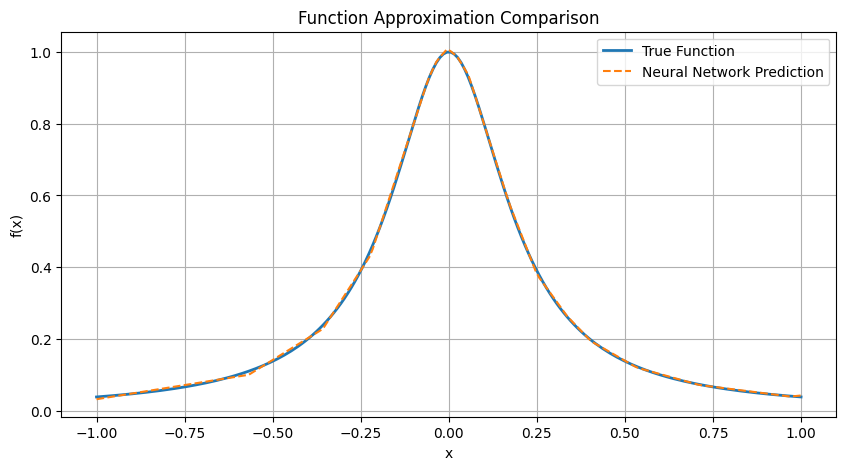

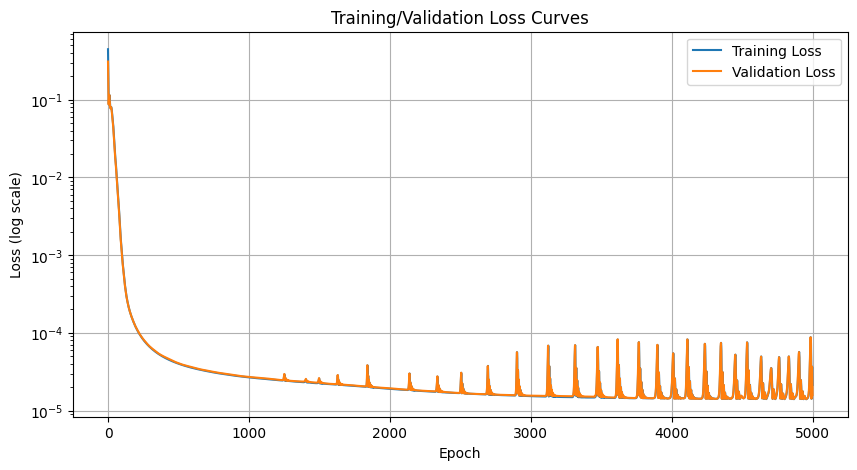

MSE: 0.000016
Max Error: 0.011540


In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 生成數據
x_train = torch.linspace(-1, 1, 1000).view(-1, 1)
y_train = 1 / (1 + 25 * x_train**2)
x_val = torch.linspace(-1, 1, 200).view(-1, 1)
y_val = 1 / (1 + 25 * x_val**2)

# 定義神經網路
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(1, 20),
            torch.nn.ReLU(),
            torch.nn.Linear(20, 20),
            torch.nn.ReLU(),
            torch.nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.layers(x)

model = Net()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 訓練模型
train_loss, val_loss = [], []
for epoch in range(5000):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        val_pred = model(x_val)
        v_loss = criterion(val_pred, y_val)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Train Loss: {loss.item():.4f}, Val Loss: {v_loss.item():.4f}')

    train_loss.append(loss.item())
    val_loss.append(v_loss.item())

# 預測結果
with torch.no_grad():
    y_pred = model(x_val).numpy()

# 圖一：函數擬合對比
plt.figure(figsize=(10, 5))
plt.plot(x_val.numpy(), y_val.numpy(), label='True Function', linewidth=2)
plt.plot(x_val.numpy(), y_pred, '--', label='Neural Network Prediction')
plt.title('Function Approximation Comparison')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# 圖二：訓練曲線
plt.figure(figsize=(10, 5))
plt.semilogy(train_loss, label='Training Loss')
plt.semilogy(val_loss, label='Validation Loss')
plt.title('Training/Validation Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss (log scale)')
plt.legend()
plt.grid(True)
plt.show()

# 計算誤差
mse = criterion(model(x_val), y_val).item()
max_error = torch.max(torch.abs(model(x_val) - y_val)).item()

print(f'MSE: {mse:.6f}')
print(f'Max Error: {max_error:.6f}')
